In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data = pd.read_csv("/content/drive/MyDrive/2124802050013_ML_Lab6/iris.csv")
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Khảo sát

In [3]:
print("Number duplicate data: ", data.duplicated().sum())

Number duplicate data:  3


In [4]:
#drop duplicate data
data.drop_duplicates(inplace=True)

In [5]:
print("Number duplicate data after drop: ", data.duplicated().sum())

Number duplicate data after drop:  0


In [6]:
#Khi drop data sẽ tạo lỗ hỏng trong index
#nên dùng reset_index() để thiết lập lại index data để dễ dàng truy suất
data.reset_index()

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
142,145,6.7,3.0,5.2,2.3,virginica
143,146,6.3,2.5,5.0,1.9,virginica
144,147,6.5,3.0,5.2,2.0,virginica
145,148,6.2,3.4,5.4,2.3,virginica


,Total,Percent
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


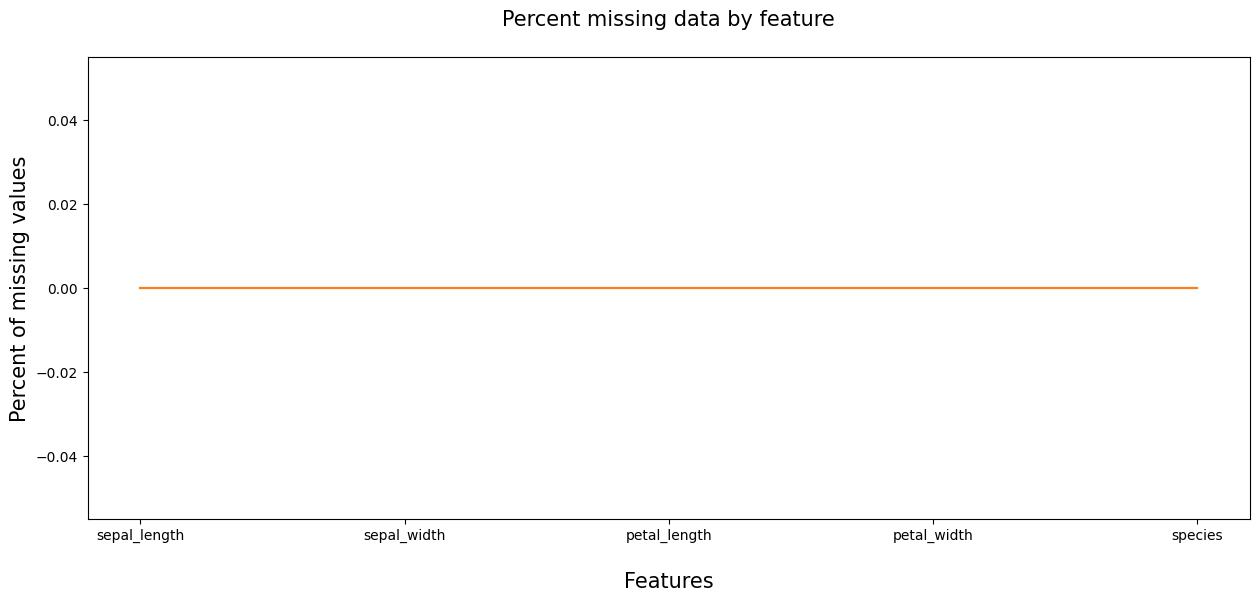

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=0)
# sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.plot(missing_data)
plt.xlabel('\nFeatures', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature\n', fontsize=15)
missing_data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


### Mã hóa dữ liệu sử dụng LabelEncoder (nằm trong các bước tiền xử lý dữ liệu)

In [9]:
data_converted = data.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_converted['species']=labelencoder.fit_transform(data_converted['species'])
# for col in data_converted.columns:
#     data_converted[col] = labelencoder.fit_transform(data_converted[col])
data_converted

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


### Phân chia tập train, test bằng train_test_split()

In [11]:
y = data_converted['species']
x = data_converted.drop(['species'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=7)

### Áp dụng mô hình LightGBM trước khi thêm learning rate

In [12]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
model_lgbm_nolr = LGBMClassifier(force_row_wise=True)
model_lgbm_nolr = model_lgbm_nolr.fit(X_train, Y_train)

Y_pred_gbm = model_lgbm_nolr.predict(X_test)
accuracy_gbm = accuracy_score(Y_test, Y_pred_gbm)
print("Accuracy: %.2f%%" % (accuracy_gbm * 100.00))

[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 4
[LightGBM] [Info] Start training from score -1.014055
[LightGBM] [Info] Start training from score -1.069625
[LightGBM] [Info] Start training from score -1.223775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

### Áp dụng mô hình LigthGBM sau khi thêm learning rate

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model_lgbm = LGBMClassifier(force_row_wise=True)
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate = learning_rate, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 7)
grid_search = GridSearchCV(model_lgbm, param_grid, scoring = "accuracy", n_jobs = -1, cv = kfold)
# grid_result_model_lgbm = grid_search.fit(X_train, Y_train)
model_lgbm_have_learning_rate = grid_search.fit(X_train, Y_train)

print ("Best: %.2f%% using %s" % (model_lgbm_have_learning_rate.best_score_*100.00, model_lgbm_have_learning_rate.best_params_))
LightGBM = model_lgbm_have_learning_rate.best_params_

[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 4
[LightGBM] [Info] Start training from score -1.014055
[LightGBM] [Info] Start training from score -1.069625
[LightGBM] [Info] Start training from score -1.223775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [14]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_score(classifier, X_train, Y_train, X_test, Y_test, train=True, name=""):
    if train:
        print("Training results: \n")

        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(Y_train, classifier.predict(X_train))*100.00))
        print("Classification Report: \n{}\n".format(classification_report(Y_train, classifier.predict(X_train))))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(Y_train, classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, Y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print("Average Accuracy: \t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation: \t{0:.4f}\n".format(res.sdt()))
    else:
        print("Test results of {}: \n".format(name))
        print("Accuracy Score: {0:.4f}%\n".format(accuracy_score(Y_test, classifier.predict(X_test))*100))
        print("Classification Report: \n{}\n".format(classification_report(Y_test, classifier.predict(X_test))))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(Y_test, classifier.predict(X_test))))

In [15]:
print_score(model_lgbm_nolr, X_train, Y_train, X_test, Y_test, False, name="LightGBM no Learning rate")

Test results of LightGBM no Learning rate: 

Accuracy Score: 93.3333%

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.87      0.90        15
           2       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45


Confusion Matrix: 
[[11  0  0]
 [ 0 13  2]
 [ 0  1 18]]



In [16]:
print_score(model_lgbm_have_learning_rate, X_train, Y_train, X_test, Y_test, False, name="LightGBM have Learning rate")

Test results of LightGBM have Learning rate: 

Accuracy Score: 95.5556%

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Confusion Matrix: 
[[11  0  0]
 [ 0 14  1]
 [ 0  1 18]]



### Chọn thuộc tính quan trọng trong mô hình

[246 254 281 209]


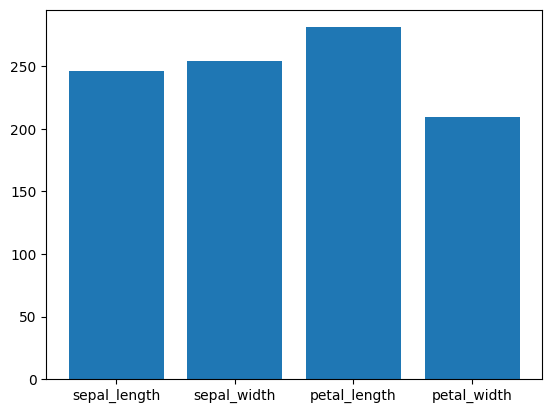

In [17]:
import matplotlib.pyplot as plt
import numpy as np
print(model_lgbm_nolr.feature_importances_)
plt.bar(range(len(model_lgbm_nolr.feature_importances_)), model_lgbm_nolr.feature_importances_)
# plt.xlabel(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.xticks(np.arange(4), ('sepal_length', 'sepal_width', 'petal_length', 'petal_width'))
plt.show()

### Save model


In [18]:
import pickle
# name = '/content/drive/MyDrive/2124802050013_ML_Lab6/model_LightGBM_have_learning_rate.pickle.dat'
name = "model_LightGBM_have_learning_rate.pickle.dat"
pickle.dump(model_lgbm_have_learning_rate, open(name, "wb"))
print("Saved model to: ", name)

Saved model to:  model_LightGBM_have_learning_rate.pickle.dat


### Load model


In [19]:
loaded_model_LightGBM_have_learning_rate = pickle.load(open(name, "rb"))
print("Loaded model from: ", name)

Loaded model from:  model_LightGBM_have_learning_rate.pickle.dat


In [20]:
predictions = loaded_model_LightGBM_have_learning_rate.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.56%


# Web


In [21]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [22]:
import anvil.server

In [23]:
anvil.server.connect("server_GBIJTONAEI5DJ4NCBJU5SZIE-SAFWQEIJZQA3A4UG")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [24]:
from sklearn import datasets
iris = datasets.load_iris()
@anvil.server.callable
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
  classification = loaded_model_LightGBM_have_learning_rate.predict([[float(sepal_length), float(sepal_width), float(petal_length), float(petal_width)]])
  return iris.target_names[classification][0]

In [ ]:
anvil.server.wait_forever()